In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

base_path = ''

In [2]:
df = pd.read_csv(base_path + 'data1019.csv')

In [3]:
data = df.copy()
data

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류
0,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
1,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
2,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
3,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
4,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
...,...,...,...,...,...,...,...,...,...,...
13085615,2022-09-29,8809267390136,서라벌특란30구,1,7800,7800,9,3,두부/콩나물/계란,일반계란
13085616,2022-09-30,8809267390136,서라벌특란30구,1,7800,7800,9,4,두부/콩나물/계란,일반계란
13085617,2022-09-30,8809267390136,서라벌특란30구,1,7800,7800,9,4,두부/콩나물/계란,일반계란
13085618,2022-09-30,8809267390136,서라벌특란30구,2,7800,15600,9,4,두부/콩나물/계란,일반계란


In [4]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['SALE_QTY', 'SALE_AMT']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [5]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

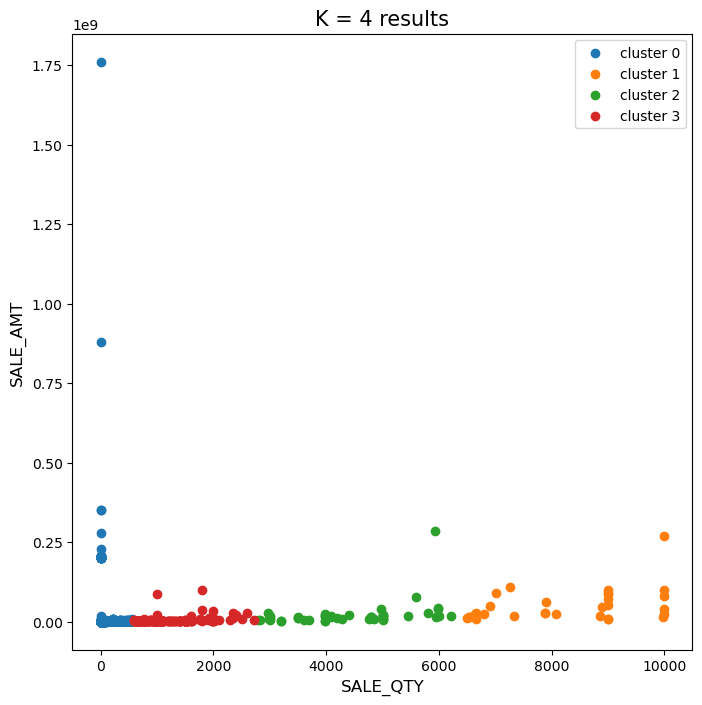

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'SALE_QTY'], df.loc[df['cluster'] == i, 'SALE_AMT'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('SALE_QTY', size = 12)
plt.ylabel('SALE_AMT', size = 12)
plt.show()